In [ ]:
# QUESTO FILE ANALIZZA IN MODO PIù GENERALE GLI ORDINI CON VOLUMI ALTI CON TIMEFRAME MAGGIORI UGUALI A 15 MINUTI
# L'ANALISI NON HA PORTATO AD UN RISULTATO SODDISFACENTE


from Functions import total_function_multiprocessing
from Helpers import create_event_keys
from time import sleep

analysis_name = '2023-2024-analysis'
list_minutes = '1440'
x = {'info':{"1m": {'vol': ['150'], 'buy_vol': ['0.9']},
     "5m": {'vol': ['75'], 'buy_vol': ['0.8']},
     "15m": {'vol': ['30',], 'buy_vol': ['0.8']},
     "30m": {'vol': ['15',], 'buy_vol': ['0.8']},
     "60m": {'vol': ['10'], 'buy_vol': ['0.8']}},
     'lvl': None}

x2 = {'info':{"1m": {'vol': ['50'], 'buy_vol': ['0.9']},
     "5m": {'vol': ['20'], 'buy_vol': ['0.8']},
     "15m": {'vol': ['8'], 'buy_vol': ['0.8']},
     "30m": {'vol': ['5'], 'buy_vol': ['0.8']},
     "60m": {'vol': ['3'], 'buy_vol': ['0.8']}},
     'lvl': '150'}

x3 = {'info':{"1m": {'vol': ['20'], 'buy_vol': ['0.9']},
     "5m": {'vol': ['10'], 'buy_vol': ['0.8']},
     "15m": {'vol': ['3'], 'buy_vol': ['0.8']},
     "30m": {'vol': ['2'], 'buy_vol': ['0.8']}},
     'lvl': '50'}

X = [x,x2,x3]

event_keys = create_event_keys(X, list_minutes, analysis_name)
print(event_keys)
n_processes = 8
analysis_timeframe=7

UNLOCK = True
n_iterations = 30

for i in range(n_iterations):
    if UNLOCK:
        shared_data = total_function_multiprocessing(event_keys, analysis_timeframe, n_processes) 
        iterazione = i+1
    msg=f'{iterazione}/{n_iterations} COMPLETED'
    print(msg)

    print('sleeping')
    sleep(5)

In [2]:
#DOWNLOAD AND SHOW OUTPUT FROM TOTAL MULTIPROCESSING

import sys
sys.path.insert(0,'..')
from Functions import download_show_output
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', None)

minimum_event_number = 1
minimum_event_number_list = [minimum_event_number]
minimum_coin_number = 1
mean_threshold = -5
lb_threshold = -15
frequency_threshold = 1
std_multiplier = 10
early_validation = False
file_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis.json"
start_analysis= datetime(2024,1,1)
early_validation = datetime(2025,2,1)
output, complete_info = download_show_output(minimum_event_number=minimum_event_number, minimum_coin_number=minimum_coin_number,
                                      mean_threshold=mean_threshold, lb_threshold=lb_threshold, frequency_threshold=frequency_threshold, early_validation=early_validation,
                                        std_multiplier=std_multiplier, file_path=file_path, start_analysis=start_analysis)
df = pd.DataFrame(output).transpose()
print(len(df['mean']))
df.sort_values(by=['upper_bound'], ascending=False)

#df.sort_values(by=['lower_bound'], ascending=False)

Reading from ANALYSIS 2024
14


,mean,std,max,min,median_max,median_min,standings,n_coins,n_events,upper_bound,lower_bound,frequency/month
buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150,1.09,5.20,7.75,-4.50,3.18,-3.21,101.86,245.0,306.0,6.29,-4.11,18.25
buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150,1.07,3.84,7.14,-4.45,3.40,-3.80,100.62,248.0,321.0,4.91,-2.77,18.81
buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150,0.73,3.26,5.76,-3.92,3.13,-3.27,102.47,210.0,233.0,3.99,-2.53,13.95
buy_vol_1m:0.9/vol_1m:150/timeframe:1440,-0.24,3.53,5.93,-4.18,2.39,-3.14,307.47,247.0,634.0,3.29,-3.77,37.74
buy_vol_30m:0.8/vol_30m:15/timeframe:1440,-0.53,3.56,6.64,-4.84,2.24,-3.88,310.39,215.0,456.0,3.03,-4.09,27.14
buy_vol_30m:0.8/vol_30m:5/timeframe:1440/lvl:150,0.33,2.70,4.97,-3.70,2.63,-3.05,96.42,157.0,141.0,3.03,-2.37,8.46
buy_vol_5m:0.8/vol_5m:10/timeframe:1440/lvl:50,0.42,2.35,4.07,-2.97,1.97,-1.90,28.70,102.0,243.0,2.77,-1.93,13.99
buy_vol_15m:0.8/vol_15m:30/timeframe:1440,-0.87,3.54,7.03,-5.21,2.57,-4.27,312.46,218.0,435.0,2.67,-4.41,25.89
buy_vol_5m:0.8/vol_5m:75/timeframe:1440,-0.79,3.31,7.47,-5.33,3.09,-4.63,309.18,220.0,428.0,2.52,-4.10,25.48
buy_vol_1m:0.9/vol_1m:20/timeframe:1440/lvl:50,0.30,2.21,3.44,-2.73,1.48,-1.54,27.06,111.0,387.0,2.51,-1.91,22.11


In [5]:
i=0
print(len(list(complete_info['buy_vol_30m:0.8/vol_30m:5/timeframe:1440/lvl:150']['info'].keys())))
for coin in	complete_info['buy_vol_30m:0.8/vol_30m:5/timeframe:1440/lvl:150']['info']:
    i+=len(complete_info['buy_vol_30m:0.8/vol_30m:5/timeframe:1440/lvl:150']['info'][coin])
print(i)

157
433


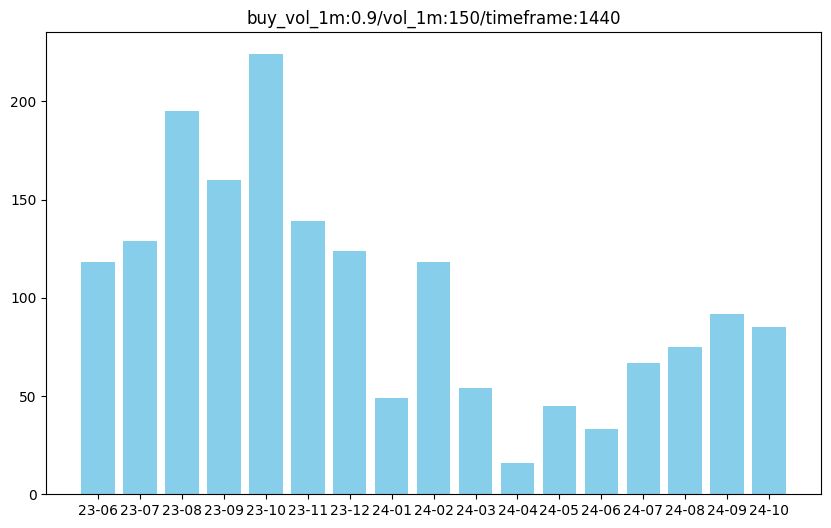

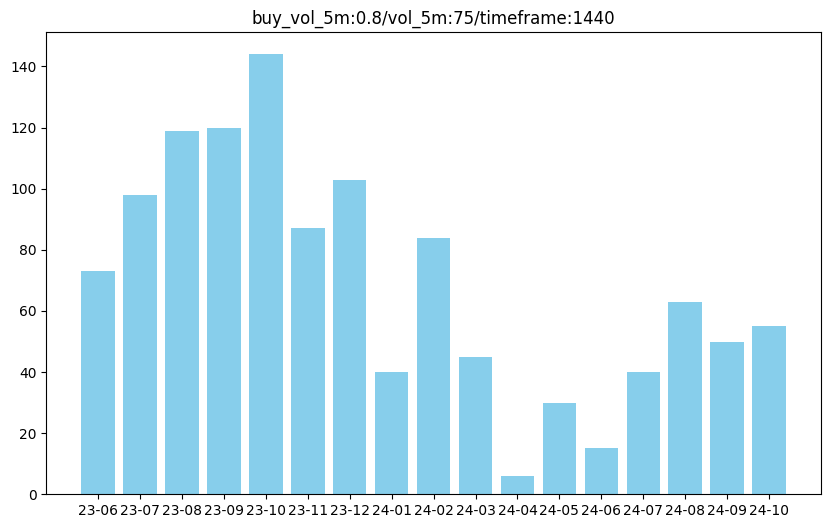

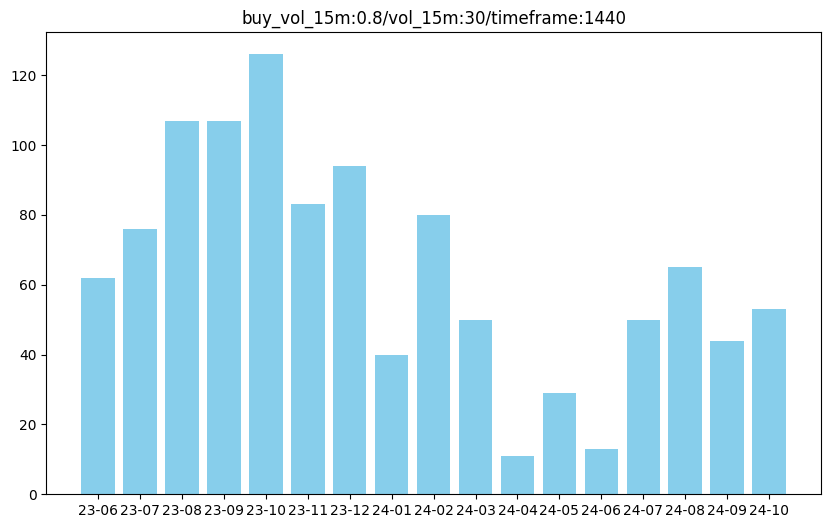

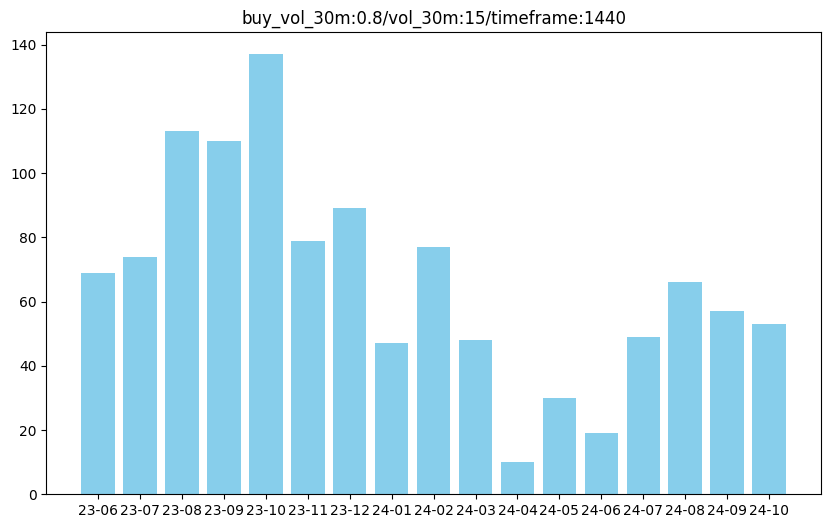

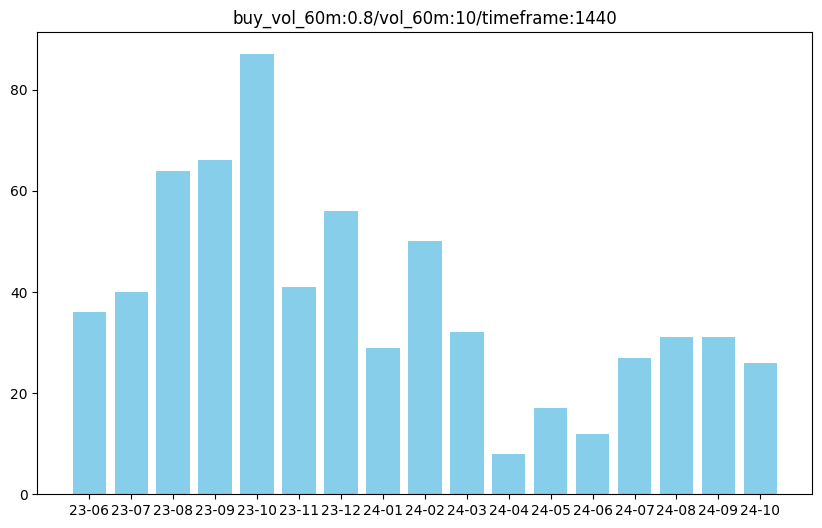

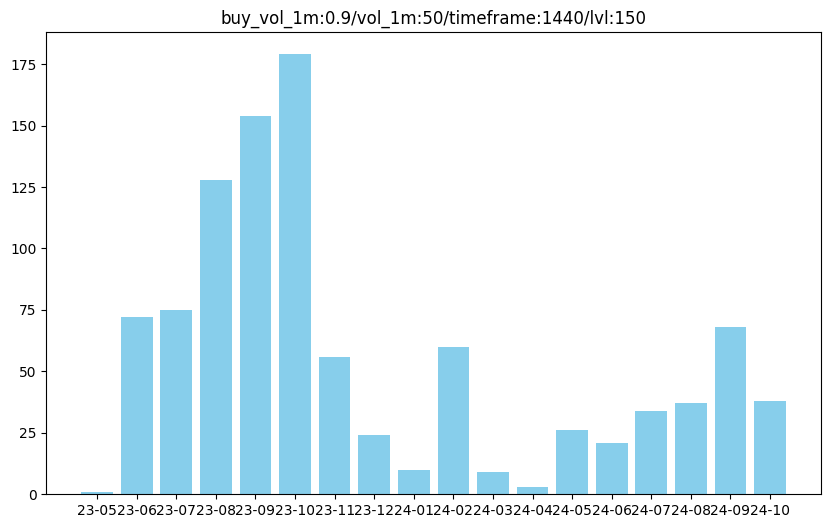

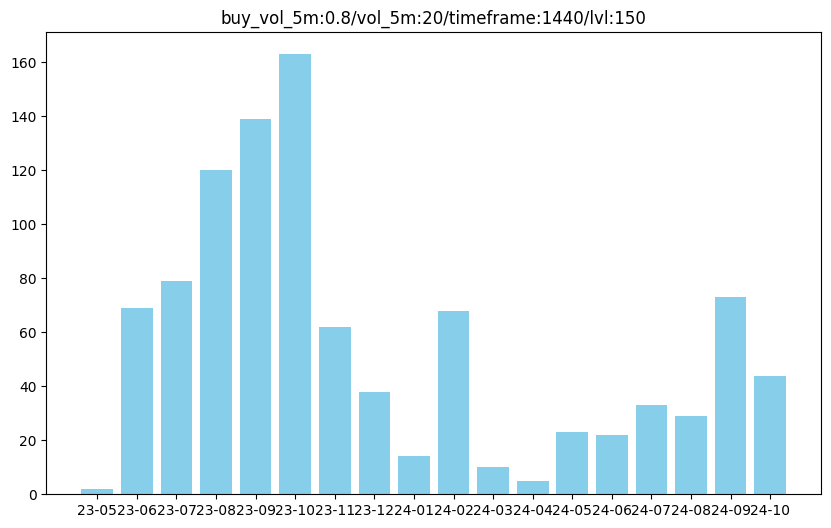

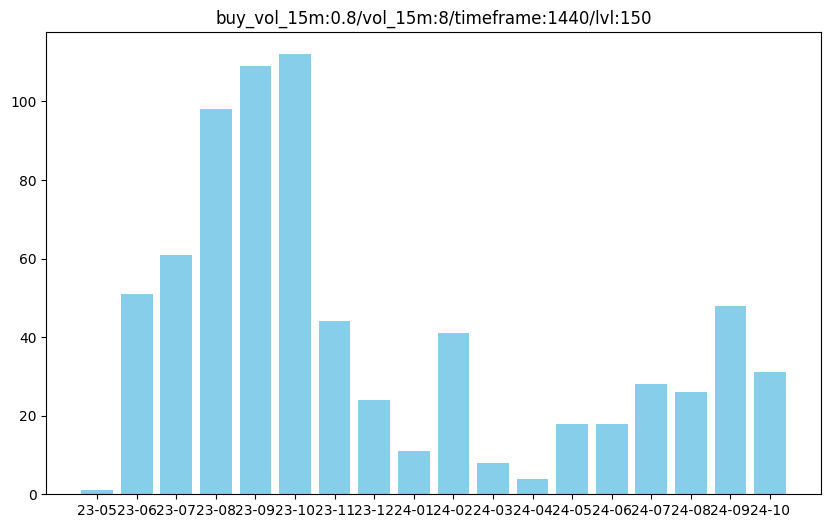

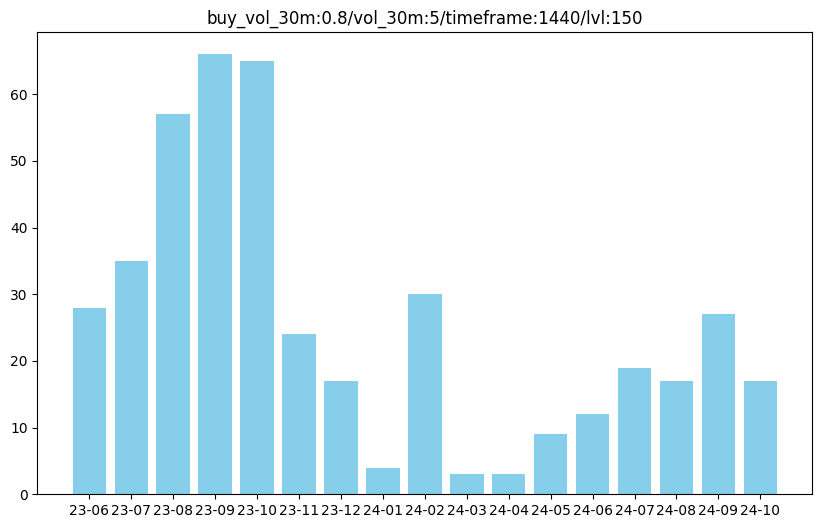

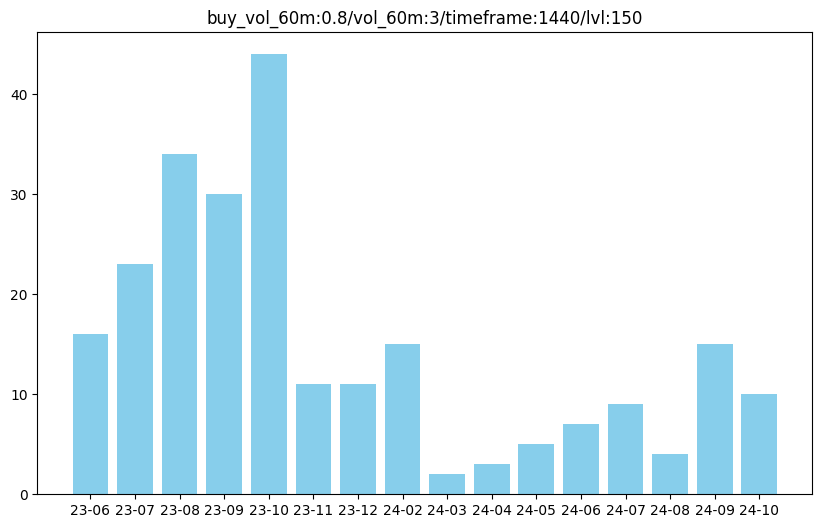

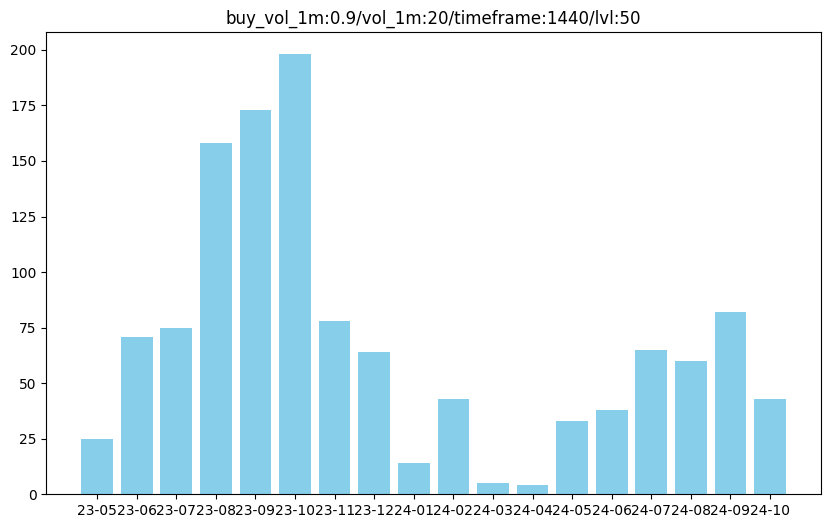

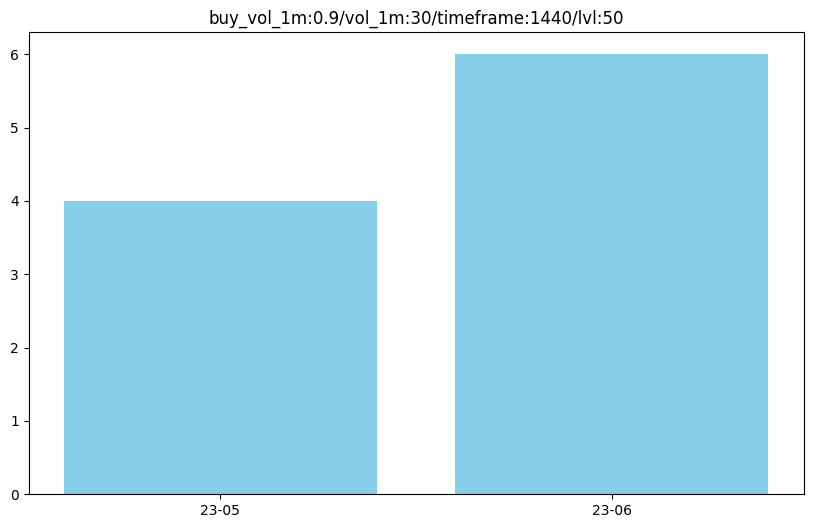

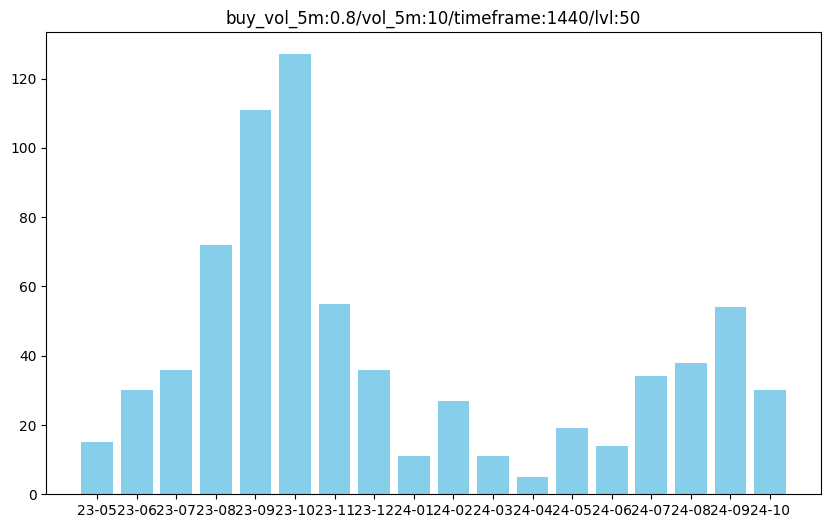

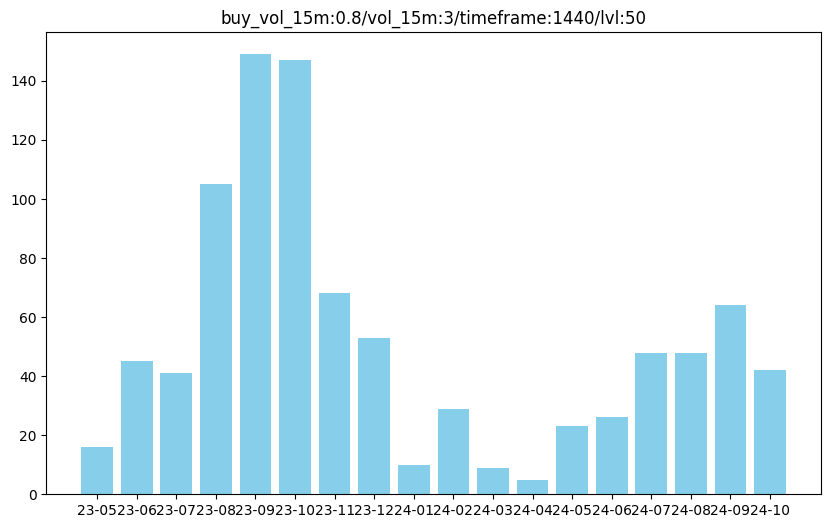

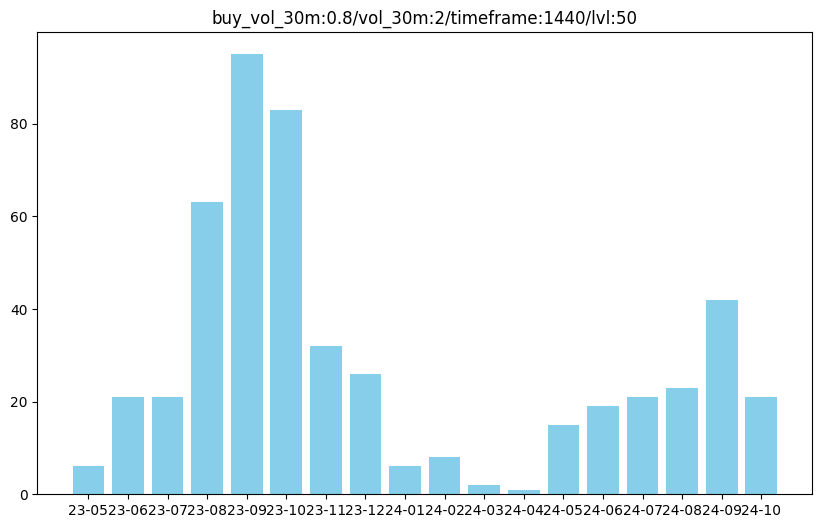

In [11]:
import matplotlib.pyplot as plt
complete_info['buy_vol_15m:0.8/vol_15m:3/timeframe:1440/lvl:50']['info']['SANDUSDT'][0]

summary = {}
for event_key in complete_info:
    summary[event_key] = {}
    for coin in complete_info[event_key]['info']:
        for event in complete_info[event_key]['info'][coin]:
            year_month_datetime = datetime.fromisoformat(event['event'])
            year_month = f"{year_month_datetime.year}-{year_month_datetime.month:02d}"
            year_month = year_month[2:]
            if year_month not in summary[event_key]:
                summary[event_key][year_month] = 1
            else:
                summary[event_key][year_month] += 1


for event_key in summary:
    sorted_data = dict(sorted(summary[event_key].items()))
    months = list(sorted_data.keys())
    values = list(sorted_data.values())
    plt.figure(figsize=(10, 6))
    plt.bar(months, values, color='skyblue')
    plt.title(event_key)



In [8]:
# key_list_analysis = ["buy_vol_5m:0.9/vol_5m:20/trades_5m:0.1/timeframe:1440"]
# tmp_info = {}
# tmp_output = {}
# for key in info:
#     if key in key_list_analysis:
#         tmp_info[key] = info[key]
#         tmp_output[key] = output[key]

# info = tmp_info
# output = tmp_output
# del tmp_info
# del tmp_output

# print(info['buy_vol_5m:0.9/vol_5m:20/trades_5m:0.1/timeframe:1440'].keys())
# info['buy_vol_5m:0.9/vol_5m:20/trades_5m:0.1/timeframe:1440']['frequency/month']

In [ ]:
from Analysis2023.Functions import check_investment_amount
check_investment_amount(complete_info, output, investment_amount=150)

In [ ]:
key='buy_vol_5m:0.9/vol_5m:20/trades_5m:0.1/timeframe:1440'
from Functions import getTimeseries
response = getTimeseries(complete_info, key, check_past=1440, look_for_newdata=True, plot=False)

In [ ]:
from Analysis2023.Functions import infoTimeseries
#key = 'buy_vol_5m:0.65/vol_24h:8/timeframe:4320/vlty:1'
timeseries_info = infoTimeseries(complete_info, key)
timeseries_info

In [ ]:
# ANALYZE THE RISKMANAGEMENT OF ALL KEYS FROM INFO 
import sys
sys.path.insert(0,'..')
from Analysis2023.Functions import RiskConfiguration
optimized_gain_threshold = 0
mean_gain_threshold = 0.2
DISCOVER=True
riskmanagement_conf = (minimum_event_number_list, minimum_coin_number, mean_threshold, lb_threshold, frequency_threshold, group_coins, best_coins_volatility, std_multiplier, early_validation)
df, none_riskmanagement_path  = RiskConfiguration(info, riskmanagement_conf, optimized_gain_threshold, mean_gain_threshold, early_validation, DISCOVER=DISCOVER)
df

In [ ]:
import sys
sys.path.insert(0,'..')
from Analysis2023.Functions import analyzeRiskManagementPerformance
risk_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/riskmanagement_backup/riskmanagement-2025-2-4-[50]-0-earlyvalidation-3stdmultiplier-VolFalse-391.json"
riskmanagement_path = risk_path
OPTIMIZED=True
DISCOVER=True

event_investment_amount=150


df, biggest_drop, biggest_drop_date, positive_outcome, negative_outcome, PERFORMANCE_SCENARIOS = analyzeRiskManagementPerformance(riskmanagement_path, OPTIMIZED, DISCOVER, event_investment_amount)
import pandas as pd
pd.set_option('display.max_rows', None)
print(f'Positive events: {positive_outcome}')
print(f'Negative events: {negative_outcome}')
print(f'Biggest Drop: {biggest_drop} at {biggest_drop_date}')


In [ ]:
df